En ce jour 48, il est question pour nous de revoir les tests d'hypothèses:
Nous verrons plus précisement les tests de comparaisons de moyennes, de variances et de proportions

## Importation:

librairie:

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kruskal, chi2_contingency, levene, ttest_ind, f_oneway, kstest, probplot
import statsmodels.api as sm

In [2]:
from utils.plot_uni import*

Données:

In [58]:
data_tips = sns.load_dataset('tips')
data_diamonds = sns.load_dataset('diamonds')

# Données data_tips:

In [60]:
data_tips.columns.to_list()

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [59]:
data_tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


Description des variables quantitatives:

Description de la variable total_bill

- La moyenne est: 19.79
- La médiane est: 17.80
- L'écart-type  est: 8.90
- Le premier quantile est: 13.35
- Le troisieme quantile   est: 24.13


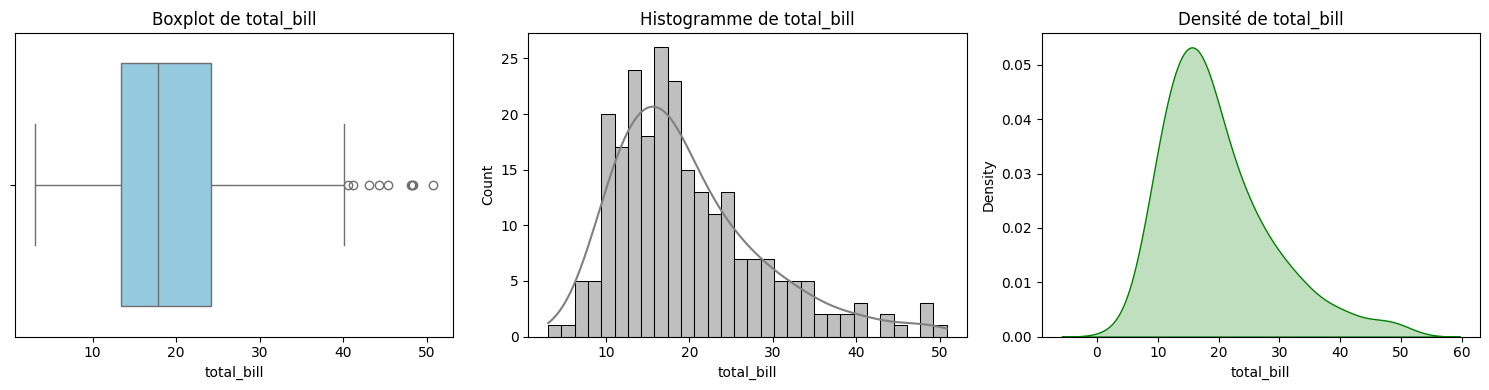


Description de la variable tip

- La moyenne est: 3.00
- La médiane est: 2.90
- L'écart-type  est: 1.38
- Le premier quantile est: 2.00
- Le troisieme quantile   est: 3.56


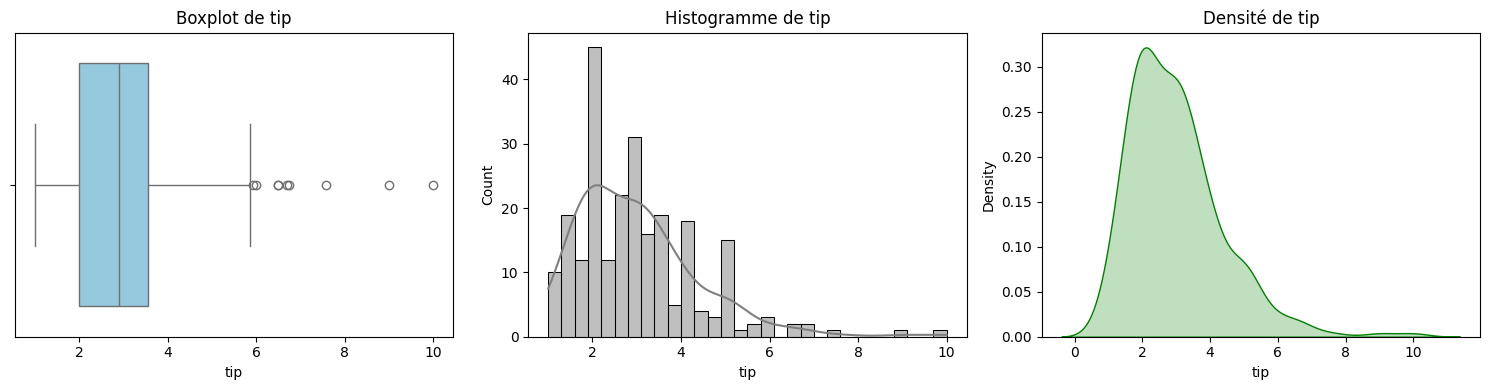


Description de la variable sex:
La valeur la plus observée est Male
Le nombre de modalité: 2
Effectif par modalité: sex
Male      157
Female     87
Name: count, dtype: int64


c:\Users\Isabelle LACMAGO\OneDrive\Bureau\Apprentissage et projets\Projets\Machine-Learning-project\src\utils\plot_uni.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[var], order=data[var].value_counts().index, ax=axes[0], palette="pastel")


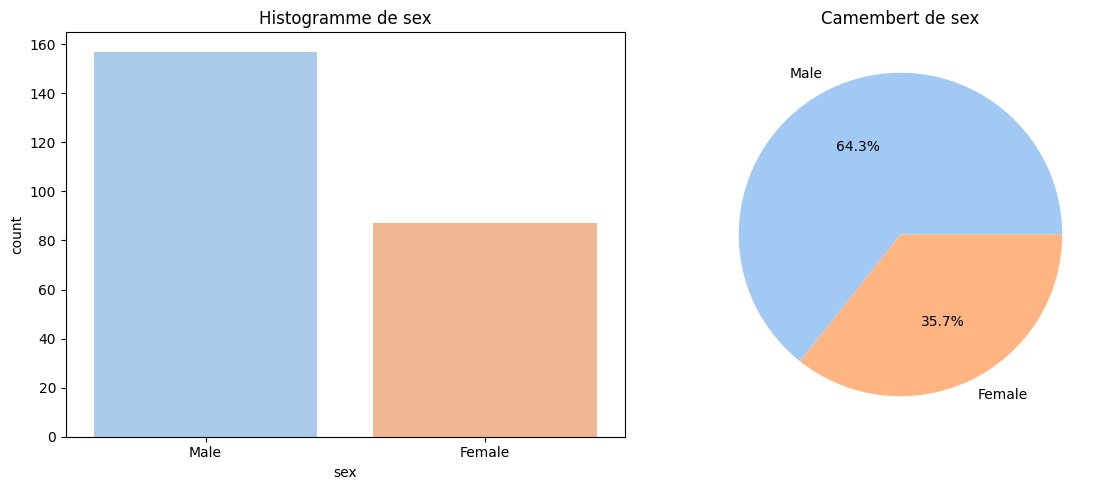


Description de la variable smoker:
La valeur la plus observée est No
Le nombre de modalité: 2
Effectif par modalité: smoker
No     151
Yes     93
Name: count, dtype: int64


c:\Users\Isabelle LACMAGO\OneDrive\Bureau\Apprentissage et projets\Projets\Machine-Learning-project\src\utils\plot_uni.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[var], order=data[var].value_counts().index, ax=axes[0], palette="pastel")


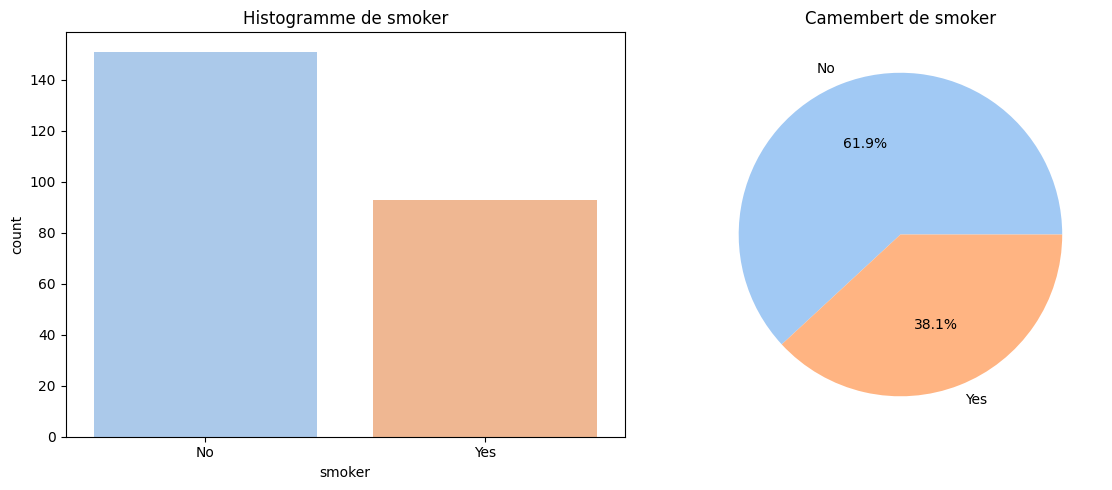


Description de la variable day:
La valeur la plus observée est Sat
Le nombre de modalité: 4
Effectif par modalité: day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


c:\Users\Isabelle LACMAGO\OneDrive\Bureau\Apprentissage et projets\Projets\Machine-Learning-project\src\utils\plot_uni.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[var], order=data[var].value_counts().index, ax=axes[0], palette="pastel")


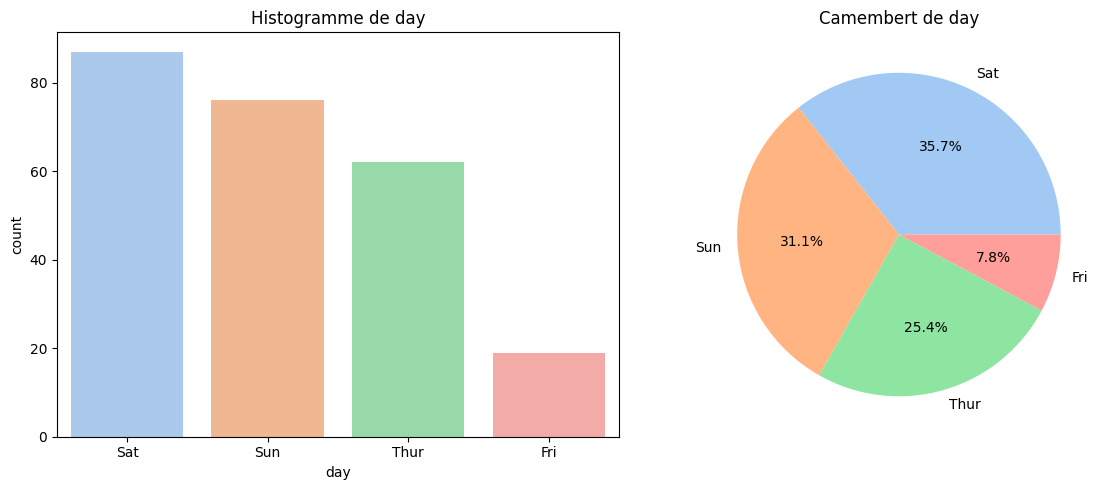


Description de la variable time:
La valeur la plus observée est Dinner
Le nombre de modalité: 2
Effectif par modalité: time
Dinner    176
Lunch      68
Name: count, dtype: int64


c:\Users\Isabelle LACMAGO\OneDrive\Bureau\Apprentissage et projets\Projets\Machine-Learning-project\src\utils\plot_uni.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[var], order=data[var].value_counts().index, ax=axes[0], palette="pastel")


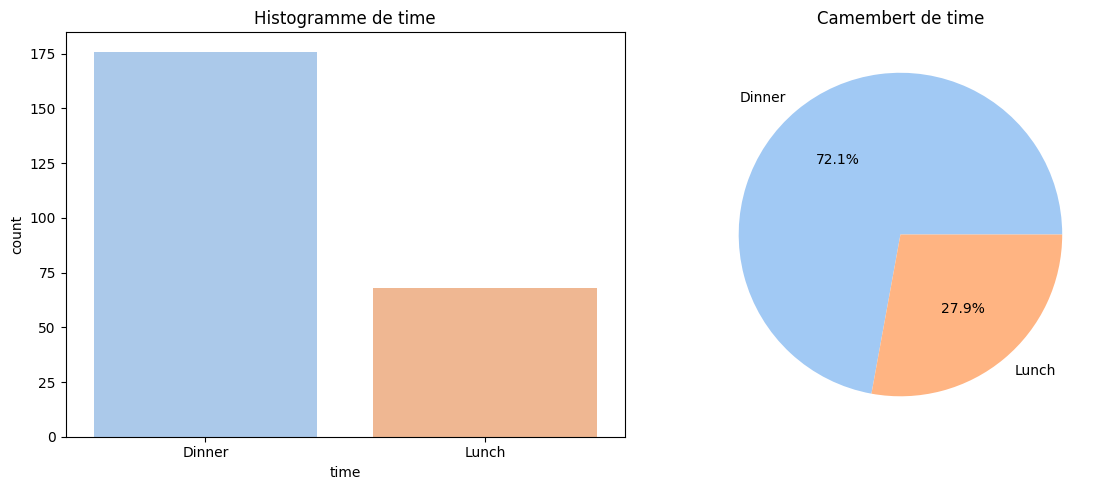


Description de la variable size:
La valeur la plus observée est 2
Le nombre de modalité: 6
Effectif par modalité: size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64


c:\Users\Isabelle LACMAGO\OneDrive\Bureau\Apprentissage et projets\Projets\Machine-Learning-project\src\utils\plot_uni.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[var], order=data[var].value_counts().index, ax=axes[0], palette="pastel")


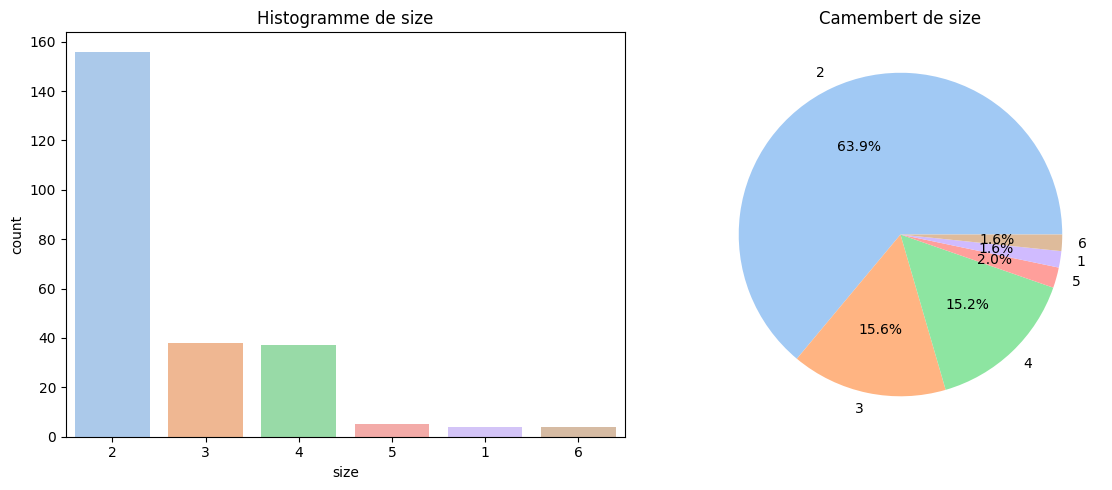

In [61]:
analyse_univarie(data=data_tips,
                 var_qual=['sex', 'smoker', 'day', 'time', 'size'],
                  var_quant=['total_bill', 'tip'] )

In [62]:
data_tips.tail(4)

,total_bill,tip,sex,smoker,day,time,size
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Quelques questions que l'on peut souhaiter répondre:
 
- Le montant moyen de l'addition est-il le même pour les fumeurs et les non-fumeurs?
- Le montant moyen de la note varie t-il en fonction des jours de la semaine?
- Le montant moyen de l'addition dépend-t il du sexe ?
- La proportion des fumeurs est-elle la même entre différents jours?

### Question 1: Le montant moyen de l'addition est-il le même pour les fumeurs et les non-fumeur?

In [63]:
groupe_fumeur = data_tips[data_tips['smoker']=='Yes']['total_bill']
groupe_non_fumeur = data_tips[data_tips['smoker']=='No']['total_bill']

In [65]:
data_tips.shape

(244, 7)

In [66]:
len(groupe_fumeur)

93

In [64]:
len(groupe_fumeur)+len(groupe_non_fumeur)

244

Comparaison des variances:

Test de Levenne: 
 - Objectif
 
 - Hypothèses
     - $H_0$: les variance sont les mêmes
     - $H_1$: 

 - Statistique de test:
    - formule:
    - loi suivi par la stat de test
- Prise de décision:
   - p_valeur
   - stat de test

In [67]:
levene_stat_f, levene_p_f = levene(groupe_fumeur,groupe_non_fumeur)
print("Comparaison de la variance du montant de l'addition en fonction de fumeur et non fumeur:")
print(f"la statistique de test est {levene_stat_f:.2f}")
print(f"La p valeur est {levene_p_f:.3f}")

Comparaison de la variance du montant de l'addition en fonction de fumeur et non fumeur:
la statistique de test est 4.05
La p valeur est 0.045


### Test t de student de comparaison des moyennes

- Objectifs:
- Hypothèses
     - $H_0$: 
     - $H_1$: 

 - Statistique de test:
    - formule
    - loi suivi par la stat de test
- Prise de décision:
   - p_valeur
   - stat de test

In [68]:
t_stat_f,t_p_f = ttest_ind(groupe_fumeur,groupe_non_fumeur,equal_var=False)

print(f"la statistique de test est {t_stat_f:.2f}")
print(f"La p valeur est {t_p_f:.3f}")

la statistique de test est 1.28
La p valeur est 0.201


Réponse à la question 1: Il y'a assez d'évidence dans les données pour conclure que le montant moyen de l'addition ne dépend pas du fait que l'on soit fumeur ou pas.

### Question 2: Le montant moyen de l'addition varie t-il en fonction des jours de la semaine?

In [69]:
data_tips.groupby('day')['total_bill'].mean()

C:\Users\Isabelle LACMAGO\AppData\Local\Temp\ipykernel_61424\3487022820.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_tips.groupby('day')['total_bill'].mean()


day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [18]:
groups = [data_tips[data_tips['day']==day]['total_bill'] for day in data_tips['day'].unique()]

In [75]:
sum([len(groups[i])for i in range(4)])

244

test de comparaison des variances:

In [76]:
levene_stat_d, levene_p_d = levene(*groups)
print("Comparaison de la variance du montant de l'addition en fonction des jours de la semaine:")
print(f"la statistique de test est {levene_stat_d:.2f}")
print(f"La p valeur est {levene_p_d:.3f}")

Comparaison de la variance du montant de l'addition en fonction des jours de la semaine:
la statistique de test est 0.67
La p valeur est 0.574


Test de comparaisons des distributions à une loi normales:

In [77]:
def ks_test_normal(group):
    # Paramètres de la loi normale théorique (moyenne et écart-type des données)
    mean = np.mean(group)
    std = np.std(group)
    
    # Test de Kolmogorov-Smirnov
    ks_statistic, p_value = kstest(group, 'norm', args=(mean, std))
    
    return ks_statistic, p_value


In [78]:
# test de Kolmogorov-Smirnov
ks_results = {}
for i, group in enumerate(groups):
    ks_stat, p_value = ks_test_normal(group)
    ks_results[data_tips['day'].unique()[i]] = {'KS Statistic': round(ks_stat,2), 'p-value': round(p_value,2), 'Effectif':len(group)}

In [79]:
ks_results = pd.DataFrame.from_dict(ks_results)

In [80]:
ks_results

,Sun,Sat,Thur,Fri
KS Statistic,0.12,0.15,0.14,0.23
p-value,0.21,0.04,0.17,0.25
Effectif,76.00,87.00,62.00,19.00


Test de comparaison des moyennes:

In [81]:
anova_stat_d, anova_p_d = f_oneway(*groups)
print("Comparaison de la moyenne du montant de l'addition en fonction des jours de la semaine:")
print(f"la statistique de test est {anova_stat_d:.2f}")
print(f"La p valeur est {anova_p_d:.3f}")

Comparaison de la moyenne du montant de l'addition en fonction des jours de la semaine:
la statistique de test est 2.77
La p valeur est 0.042


### La proportion des fumeurs est-elle la même entre différents jours?

In [82]:
tableau = pd.crosstab(data_tips['smoker'], data_tips['day'])
chi2, p_chi2, _, _ = chi2_contingency(tableau)
print("Test du Chi2 (Fumeurs vs Jours) :")
print(f"Chi2 : {chi2:.3f}, p-value : {p_chi2:.4f}\n")

Test du Chi2 (Fumeurs vs Jours) :
Chi2 : 25.787, p-value : 0.0000



In [83]:
tableau

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,17,15,42,19
No,45,4,45,57


In [84]:
data_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
